# <span style="color: purple; font-size: 35px;"> LAB2: DECISION TREE WITH SCIKIT-LEARN

- Tên sinh viên: Trần Trung Hiếu
- Mã số sinh viên: 21127608

<span style="color: #AED6F1; font-size: 20px;">IMPORT LIBRARY

In [1]:
import pandas as pd # pandas library used to process data using data frames
from sklearn.model_selection import train_test_split # used to split data and train data
import seaborn as sns # used to plot graphs and matrices
import matplotlib.pyplot as plt # used to plot graphs and matrices
from sklearn.tree import DecisionTreeClassifier # used to create and train decision tree models in machine learning
from sklearn import tree
import graphviz # used to draw decision trees
from sklearn.metrics import classification_report # used to generate detailed reports on the performance of the classification model
from sklearn.metrics import confusion_matrix # used to calculate the confusion matrix for the classification model
from sklearn.metrics import accuracy_score # used to calculate the accuracy score of the classification model

<span style="color: #AED6F1; font-size: 20px;">Preparing the data sets

<span style="color: green;">*Merge tow file poker-hand-training-true.data and poker-hand-testing.data into a single CSV file named poker-hand-data.csv*

In [2]:
# Reads data from two CSV files 'poker-hand-training-true.data' and 'poker-hand-testing.data', using the pandas library's `read_csv()` function. The `header=None` argument specifies that the CSV files do not have a header row.
trainingData = pd.read_csv('poker-hand-training-true.data', header=None)
testingData = pd.read_csv('poker-hand-testing.data', header=None)
# merge two file into file 'poker-hand-data.csv'  using the pandas library's `concat()` function
mergeData = pd.concat([trainingData, testingData])
mergeData.to_csv('poker-hand-data.csv', index=False, header=None)

<span style="color: green;">*Shuffle the data*

In [3]:
# shuffle data in mergeData and save data in file 'poker-hand-data.csv'
data = pd.read_csv('poker-hand-data.csv', header=None)
mergeData = data.sample(frac=1).reset_index(drop=True)
mergeData.to_csv('poker-hand-data.csv', index=False, header=None)

<span style="color: green;">*Create label and feature for data*

In [4]:

pokerHand = ["Nothing in hand", "One Pair", "Two Pairs", "Three of a Kind", "Straight", "Flush", "Full House", "Four of a Kind", "Straight Flush", "Royal Flush"]
attributeInformation =  ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']

rateTest = [0.6, 0.4, 0.2, 0.1]
rateTrain = [0.4, 0.6, 0.8, 0.9]

dataSet = {}
# splits the data in mergeData into feature which is the attribute of the cards and label which is the terms of that group of cards
feature = mergeData.iloc[:,:-1]
label = mergeData.iloc[:,-1]
# used to split data into training and test sets with features and labels with each element of the dataset having a train rate
for i in rateTrain:
    dataSet[i] = train_test_split(feature, label, test_size=i, random_state=0)

<span style="color: green;">*Visualize the distributions of classes in all the data sets (the original set, training set, and test set) of all proportions to show that you have prepared them appropriately*

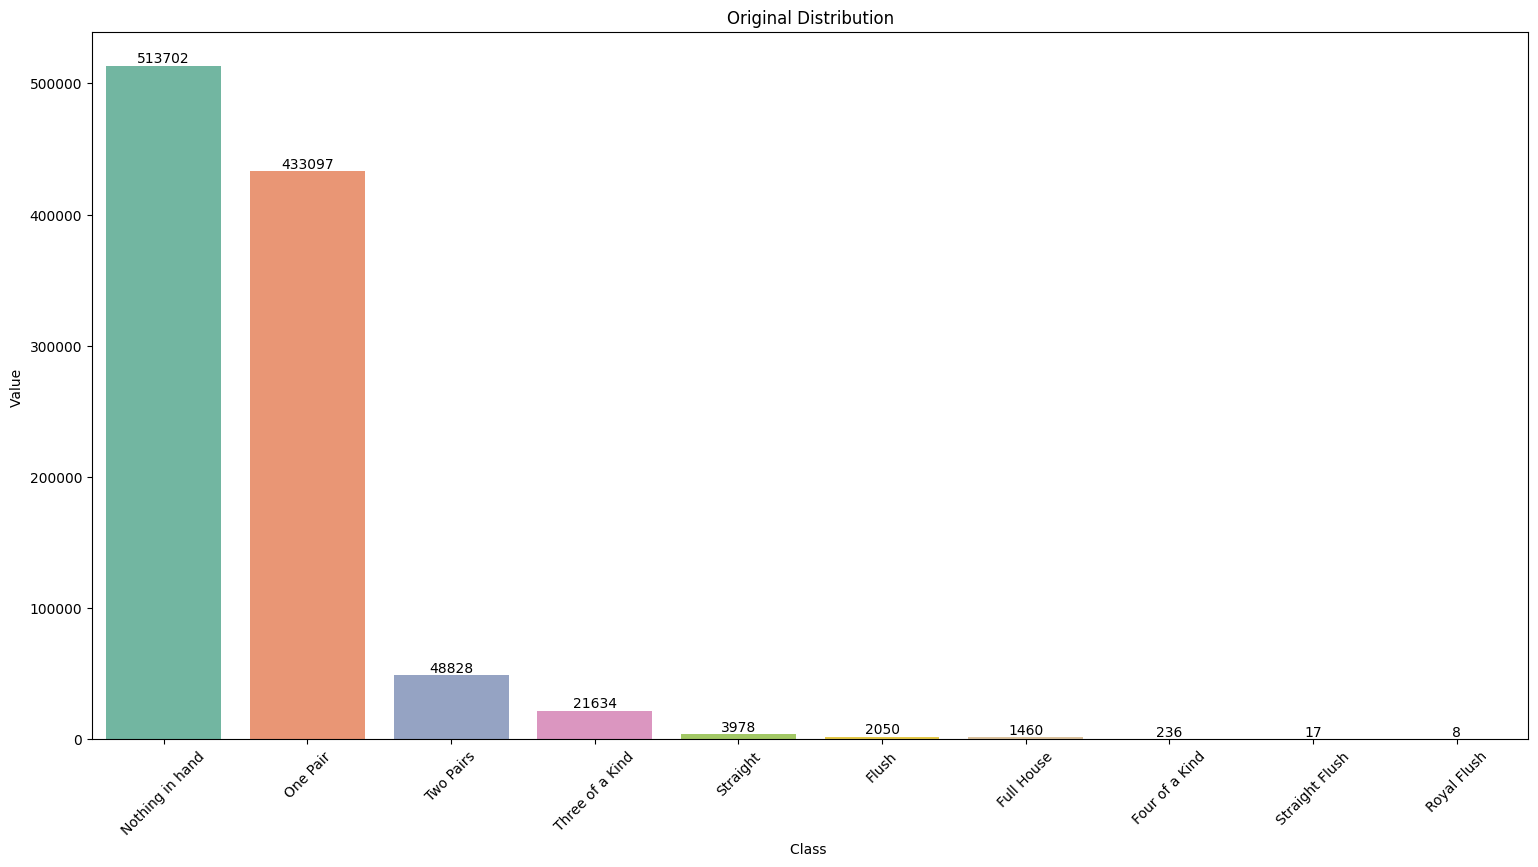

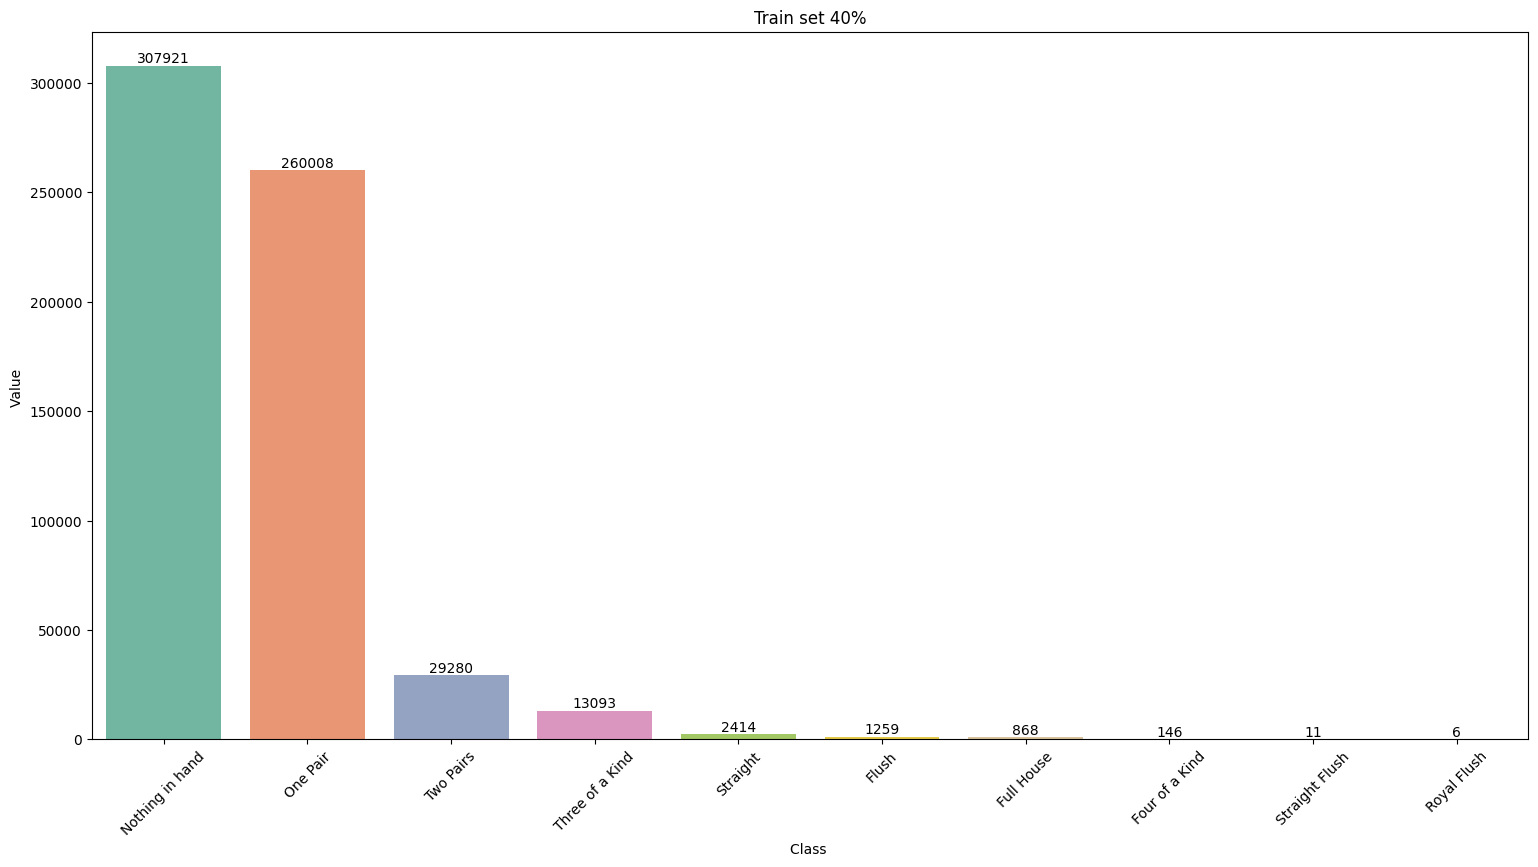

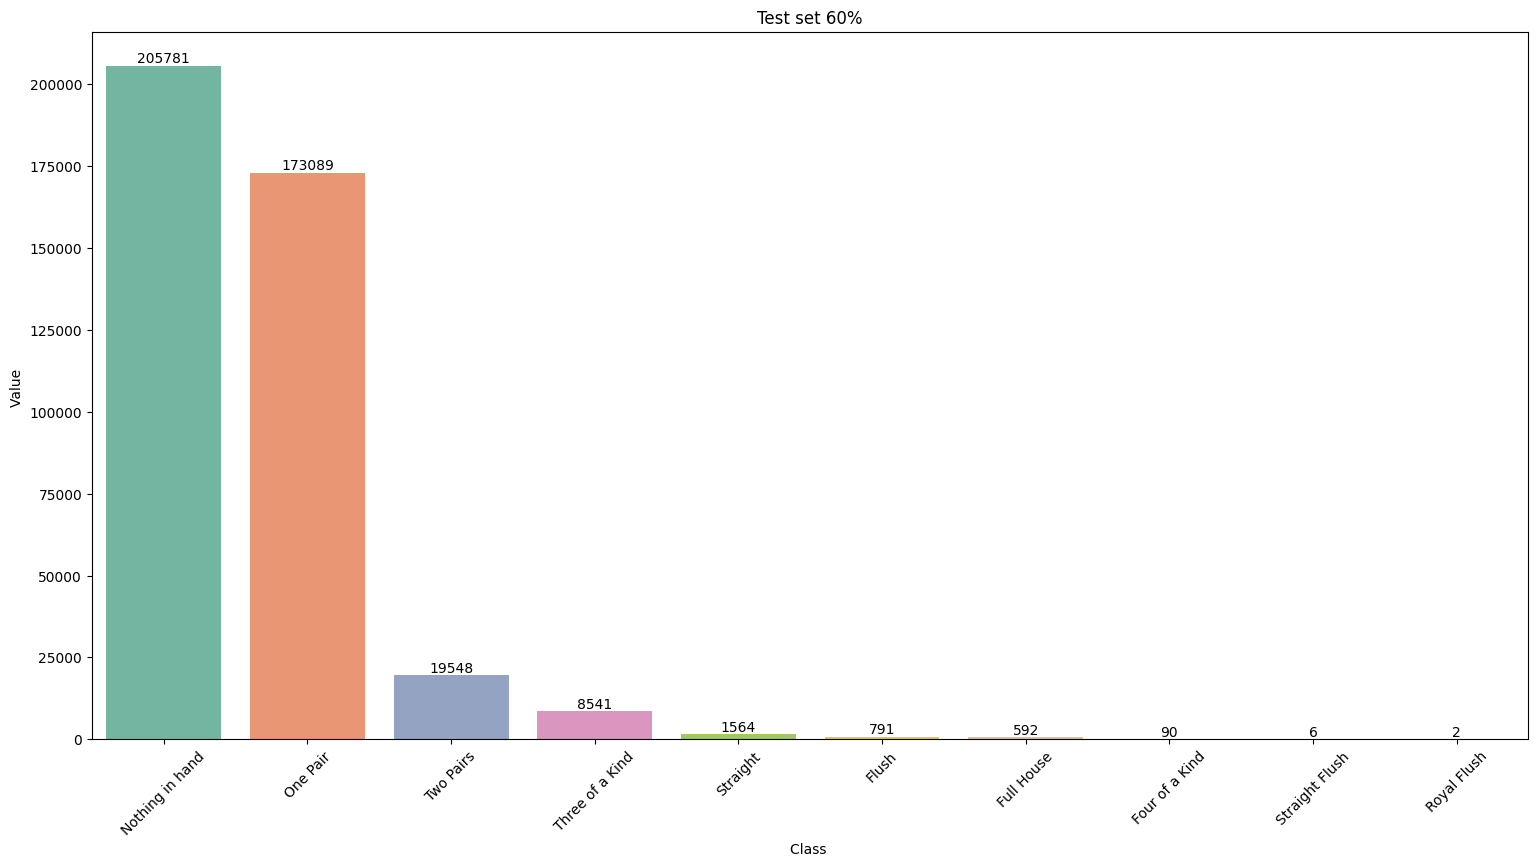

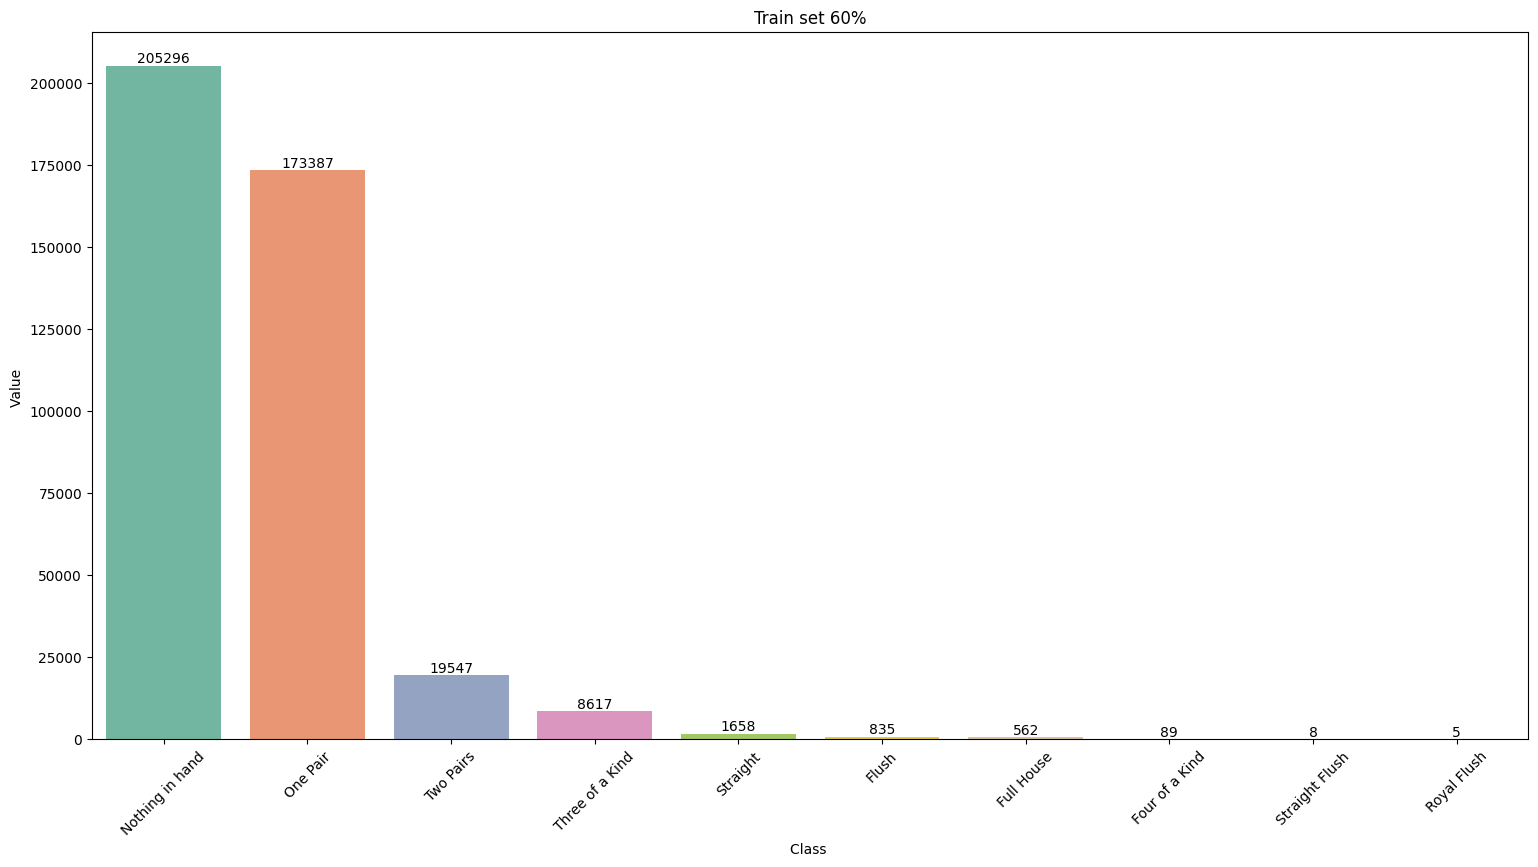

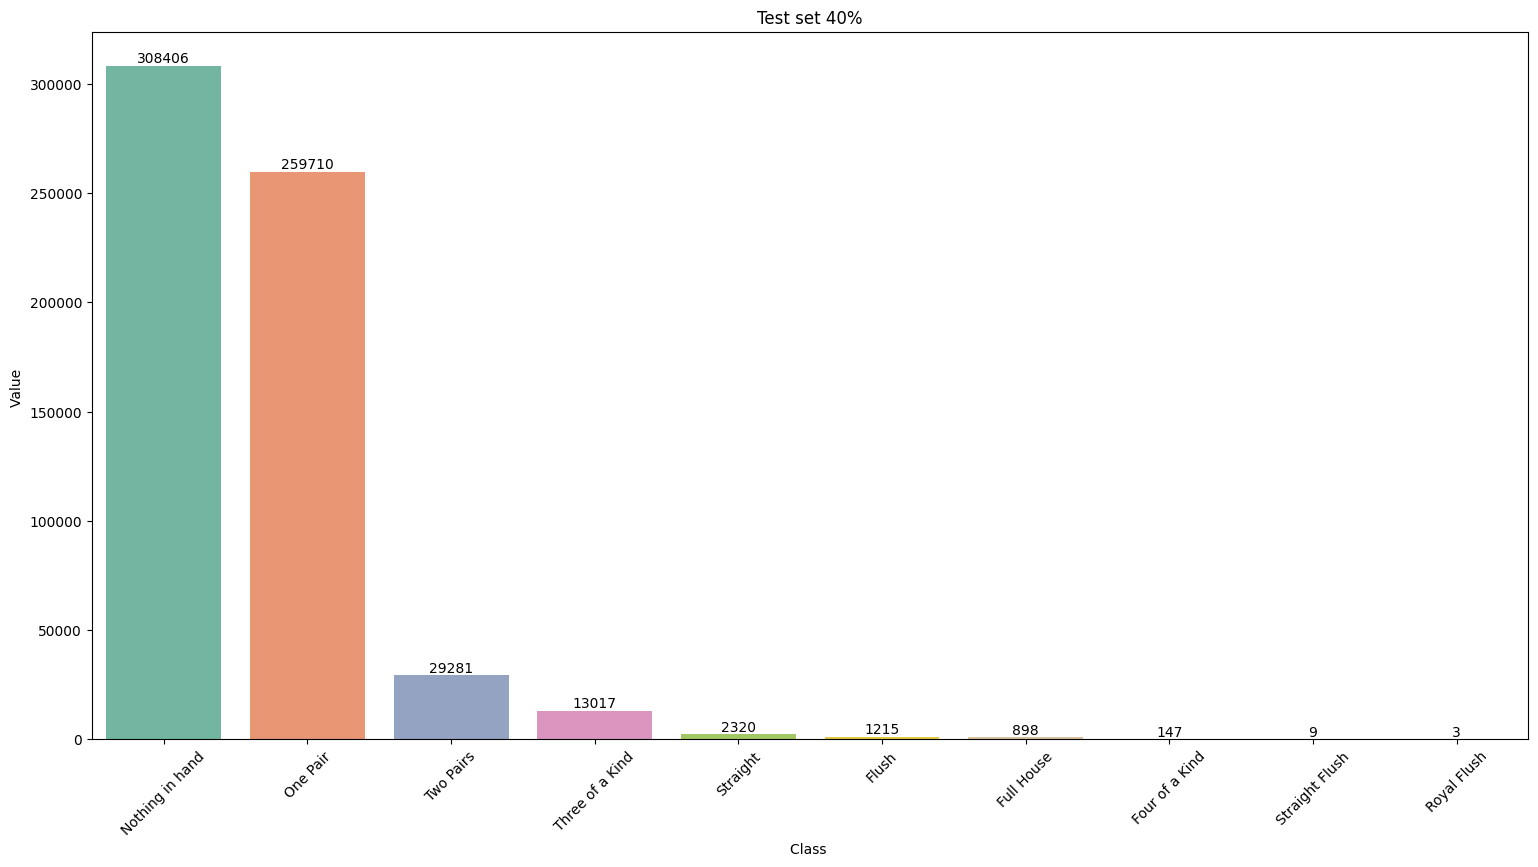

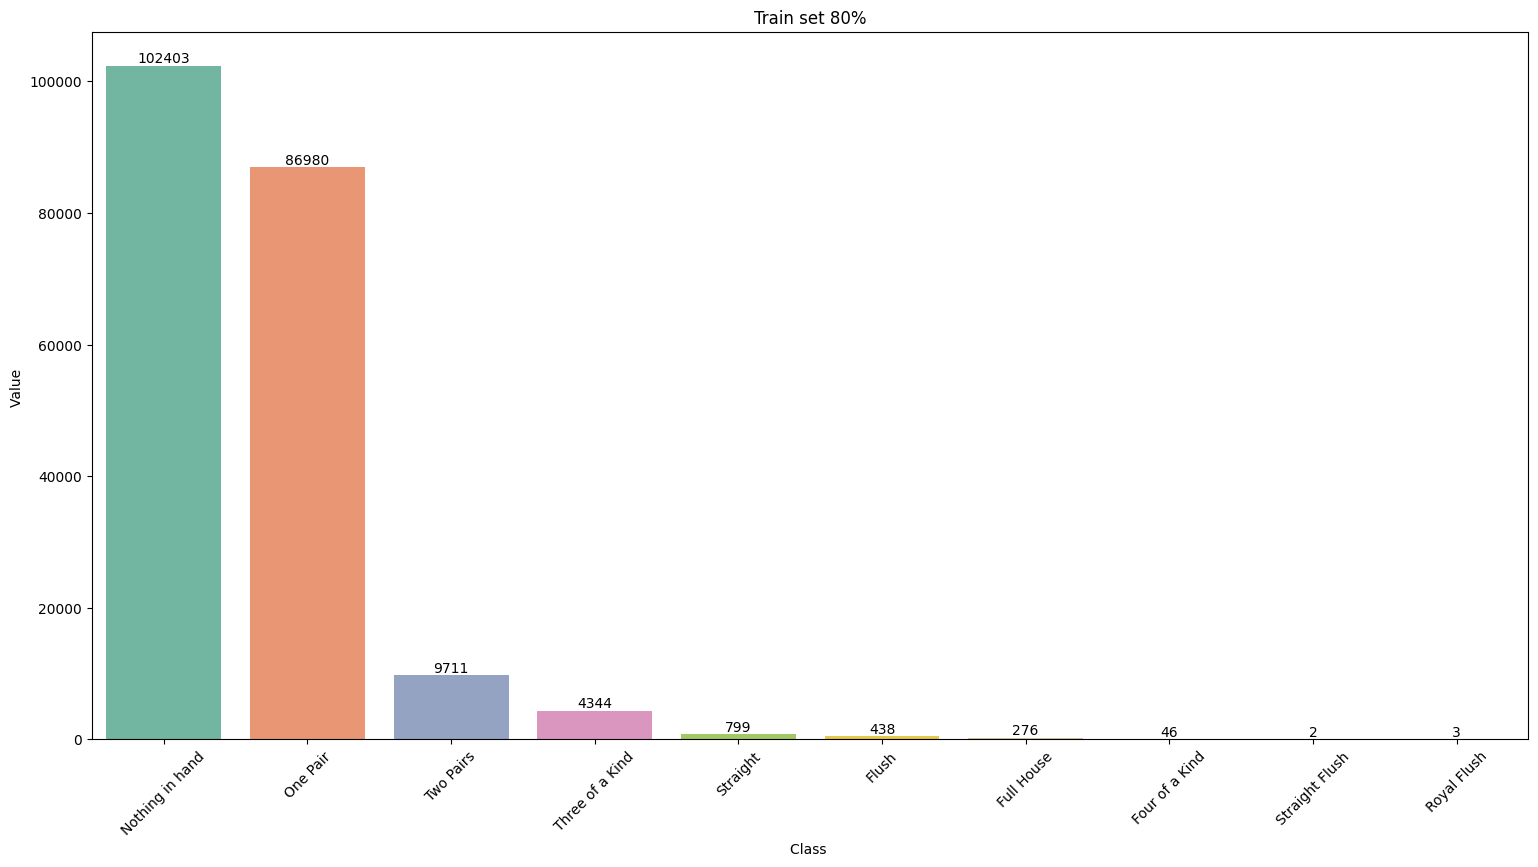

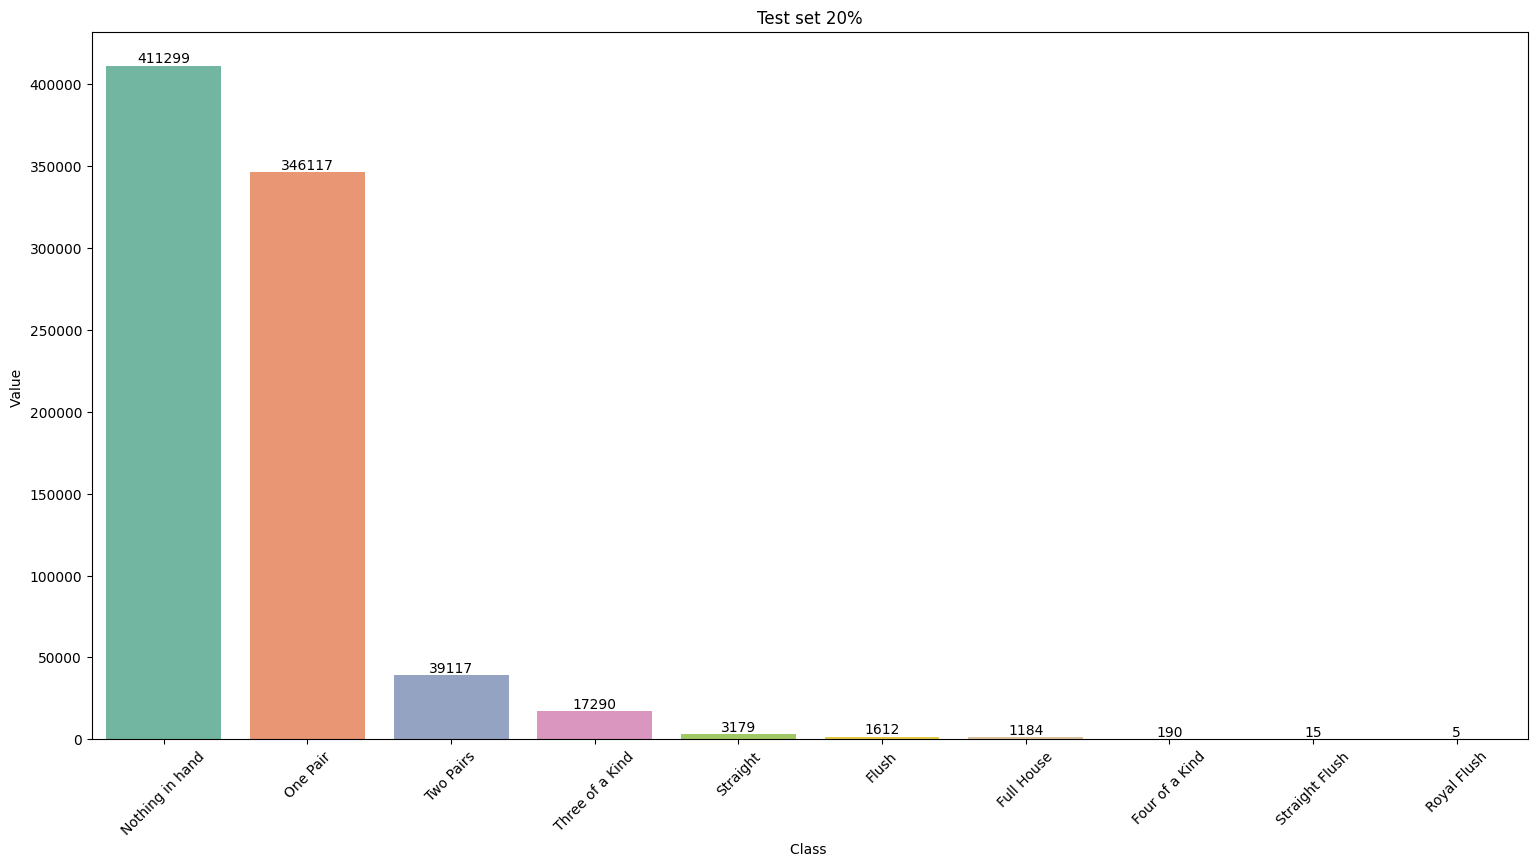

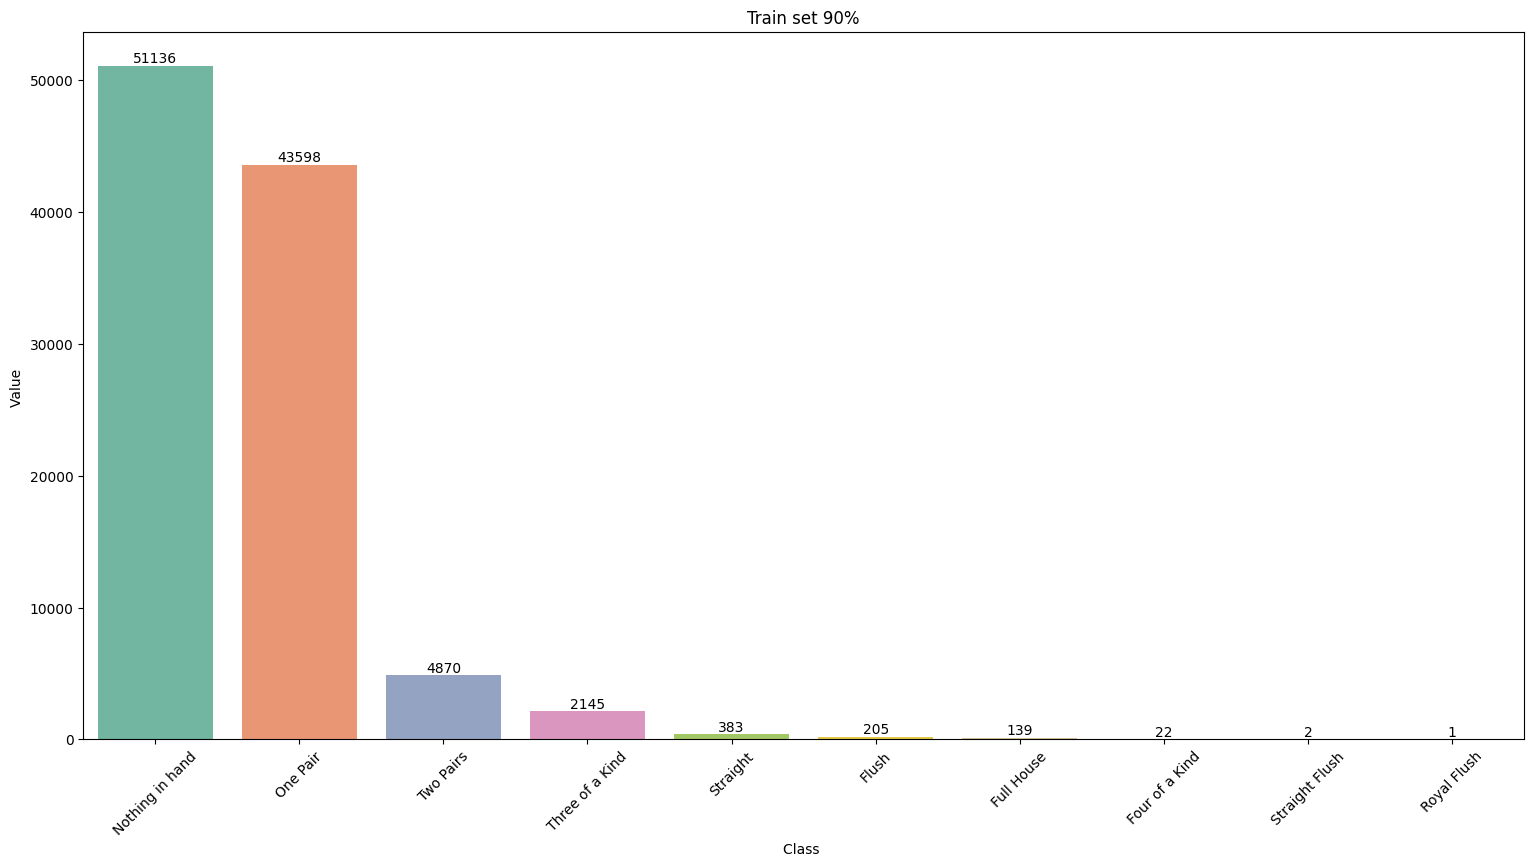

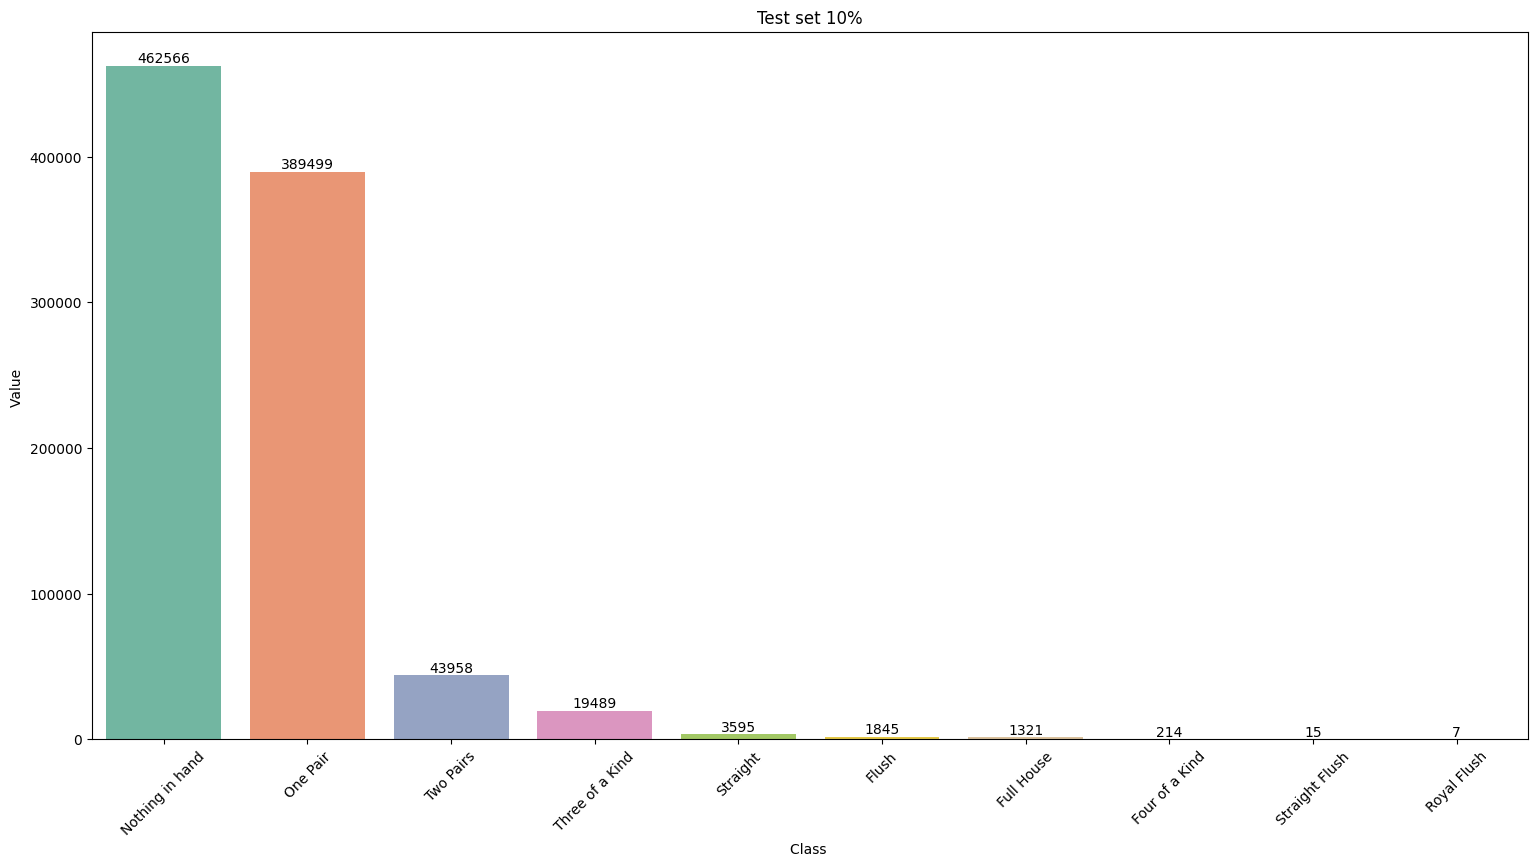

In [5]:
# count the number of occurrences of the values of the label, sorted by the value of the original distribution
originalDistribution = mergeData[10].value_counts()
valueClassDistribution = originalDistribution.values

# Create a bar chart using the Seaborn library to show the initial value distribution for the labels in the dataset. The chart has column x being the terms of the cards and column y being the number of terms
plt.figure(figsize = (30, 16))
plt.subplot(2, 2, 1)
sns.barplot(x = pokerHand, y = valueClassDistribution, palette = 'Set2')
plt.title('Original Distribution')
plt.xlabel('Class ')
plt.ylabel('Value ')
plt.xticks(rotation = 45)
for i, value in enumerate(originalDistribution):
    plt.annotate(str(value), (i, value), ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

for proportion in rateTrain:
    featureTrain, featureTest, labelTrain, labelTest = dataSet[proportion]
    # count the number of elements
    trainValue = labelTrain.value_counts()
    testValue = labelTest.value_counts()
    allClasses = pd.DataFrame({10: range(10)})
    trainValue = trainValue.reindex(allClasses[10], fill_value = 0)
    testValue = testValue.reindex(allClasses[10], fill_value = 0)

    # draw the train set chart
    plt.figure(figsize = (30, 16))
    plt.subplot(2, 2, 1)
    sns.barplot(x = pokerHand, y = trainValue.values, palette = 'Set2')
    plt.title(f'Train set {(proportion)*100:.0f}%')
    plt.xlabel('Class ')
    plt.ylabel('Value ')
    plt.xticks(rotation = 45)
    for i, value in enumerate(trainValue):
        plt.annotate(str(value), (i, value), ha = 'center', va = 'bottom')
    plt.tight_layout()
    plt.show()

    # draw the test set chart
    plt.figure(figsize = (30, 16))
    plt.subplot(2, 2, 1)
    sns.barplot(x = pokerHand, y = testValue.values, palette = 'Set2')
    plt.title(f'Test set {(1-proportion)*100:.0f}%')
    plt.xlabel('Class ')
    plt.ylabel('Value ')
    plt.xticks(rotation = 45)
    for i, value in enumerate(testValue.values):
        plt.annotate(str(value), (i, value), ha = 'center', va = 'bottom')
    plt.tight_layout()
    plt.show()



<span style="color: #AED6F1; font-size: 20px;">Building the decision tree classifiers

<!-- <span style="color: green;">*Merge tow file poker-hand-training-true.data and poker-hand-testing.data into a single CSV file named poker-hand-data.csv* -->

In [6]:
# draw a decision tree with different training rates and use entropy to analyze, the tree after the drawing is saved in the folder "Decision Tree"
# the function 'tree.export_graphviz()' to output the DOT form of the trained decision tree, creates a graphviz.Source object from the DOT data and uses render to save the decision tree as an image
for proportion in rateTrain:
    featureTrain, featureTest, labelTrain, labelTest = dataSet[proportion]
    clf = DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(featureTrain, labelTrain)
    dotData = tree.export_graphviz(clf, out_file = None, feature_names = attributeInformation, class_names = pokerHand, max_depth = 9, filled = True, rounded = True, special_characters = True)
    graph = graphviz.Source(dotData)
    graph.render(directory='Decision Tree', filename=f'Decision Tree With Train Rate {proportion*100:.0f}%')

<span style="color: #AED6F1; font-size: 20px;">Evaluating the decision tree classifiers


<span style="color: green;">*Decision Tree Classifier Report and Confusion Matrix for each trai rate*

Classifiers report with train rate 40%
               precision    recall  f1-score   support

           0       0.65      0.63      0.64    205781
           1       0.52      0.52      0.52    173089
           2       0.19      0.21      0.20     19548
           3       0.16      0.20      0.18      8541
           4       0.12      0.13      0.12      1564
           5       0.08      0.12      0.10       791
           6       0.05      0.07      0.06       592
           7       0.02      0.02      0.02        90
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2

    accuracy                           0.55    410004
   macro avg       0.18      0.19      0.18    410004
weighted avg       0.56      0.55      0.56    410004

Classifiers report with train rate 60%
               precision    recall  f1-score   support

           0       0.65      0.63      0.64    308406
           1       0.52      0.52      0.52    25971

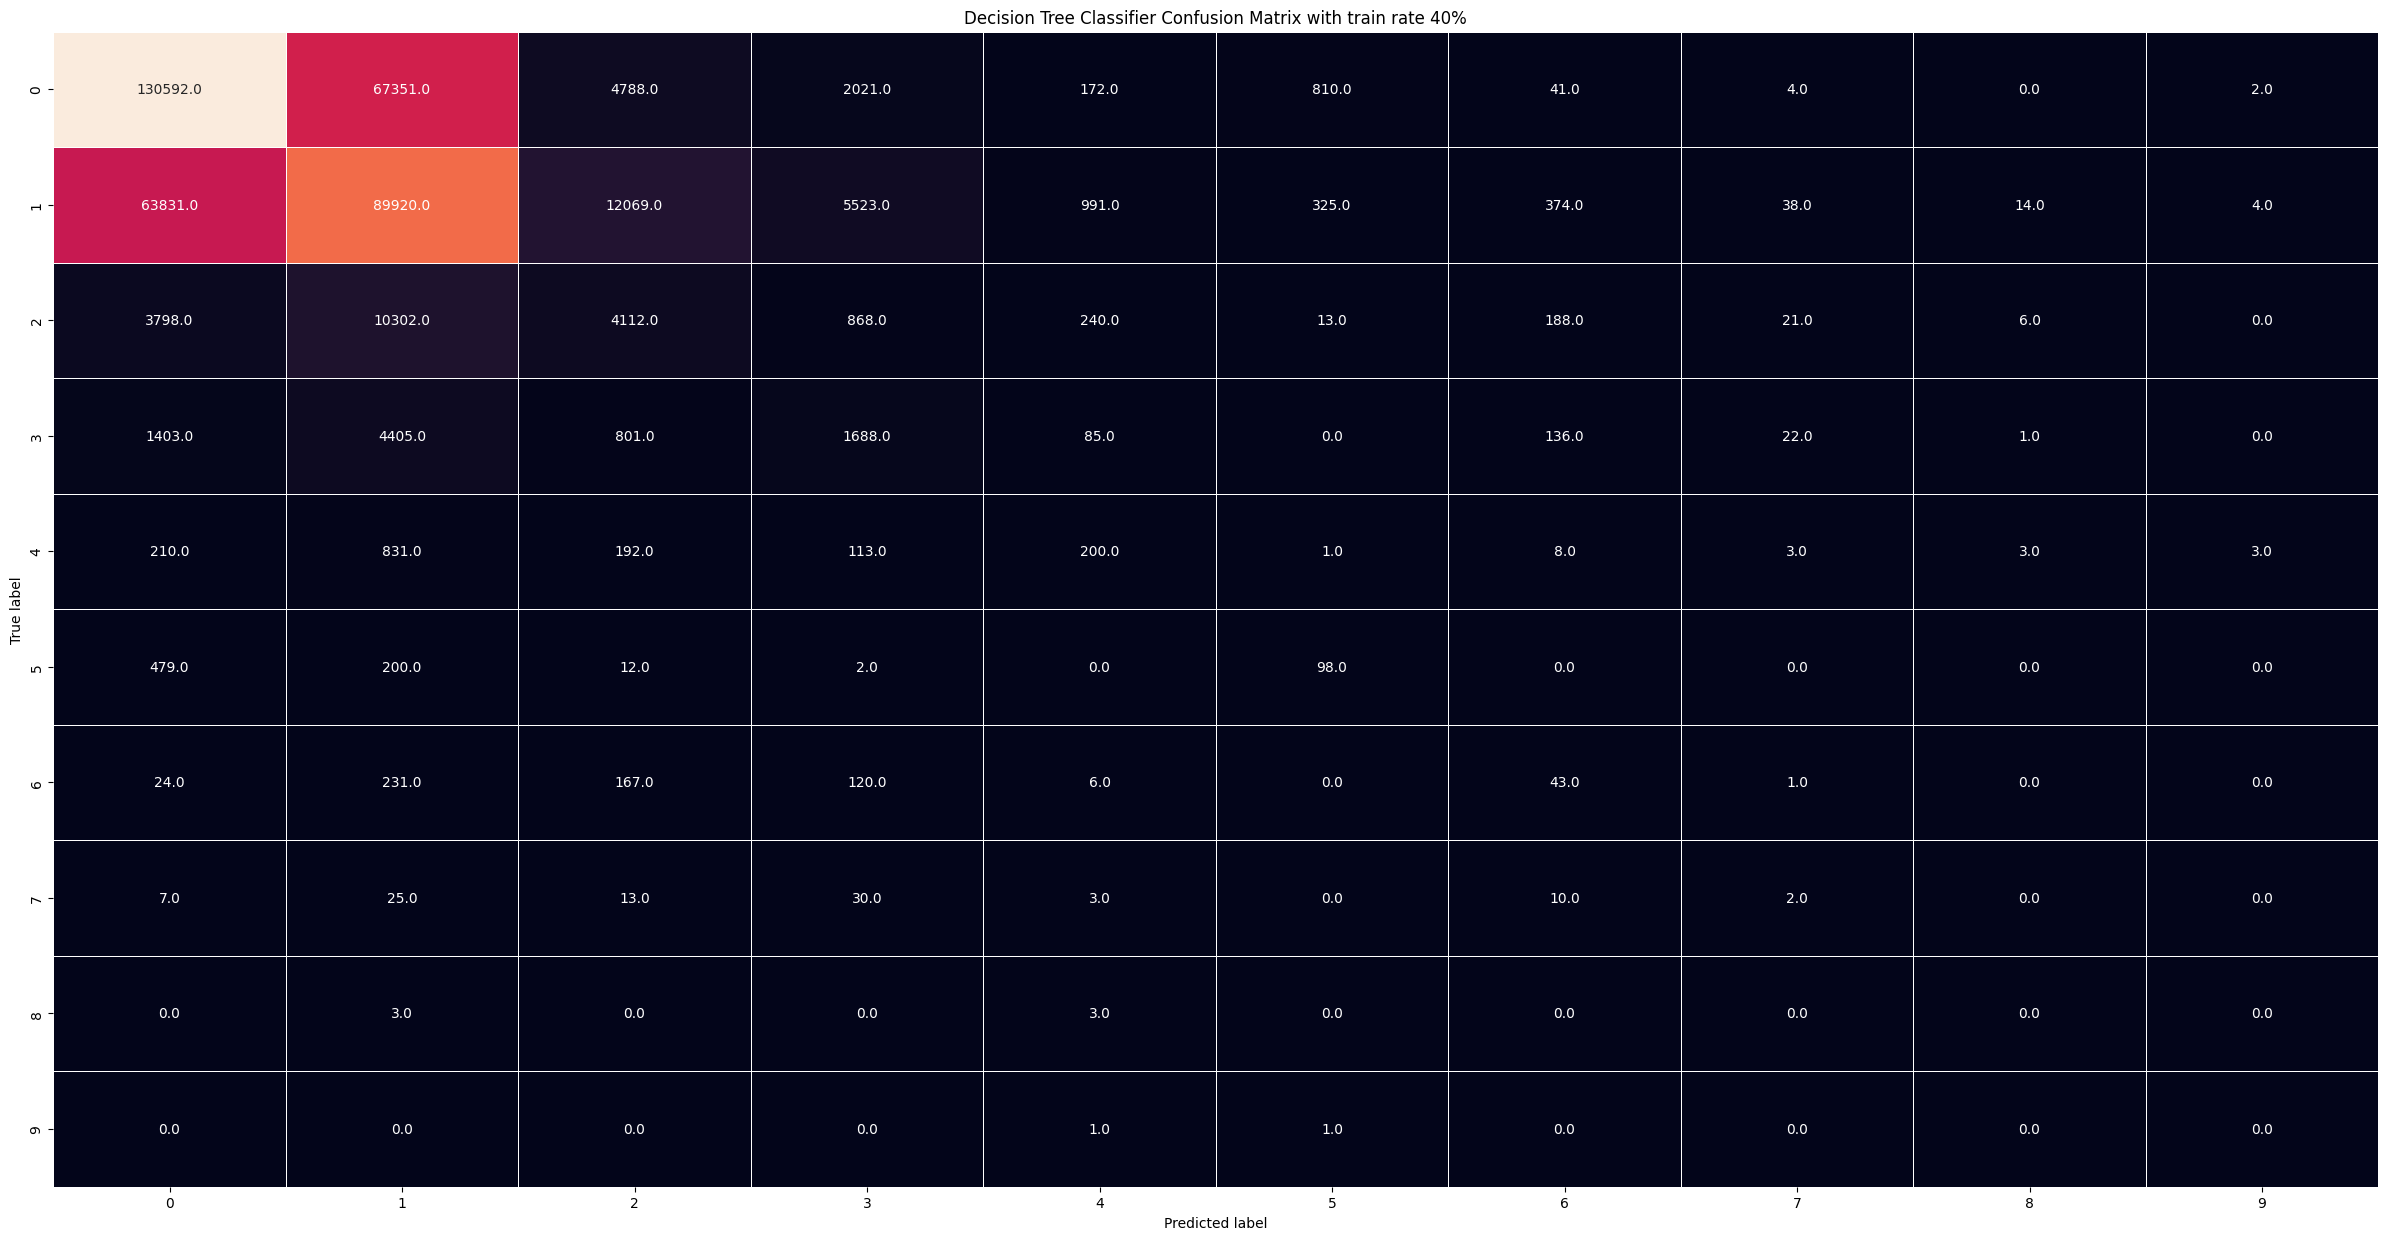

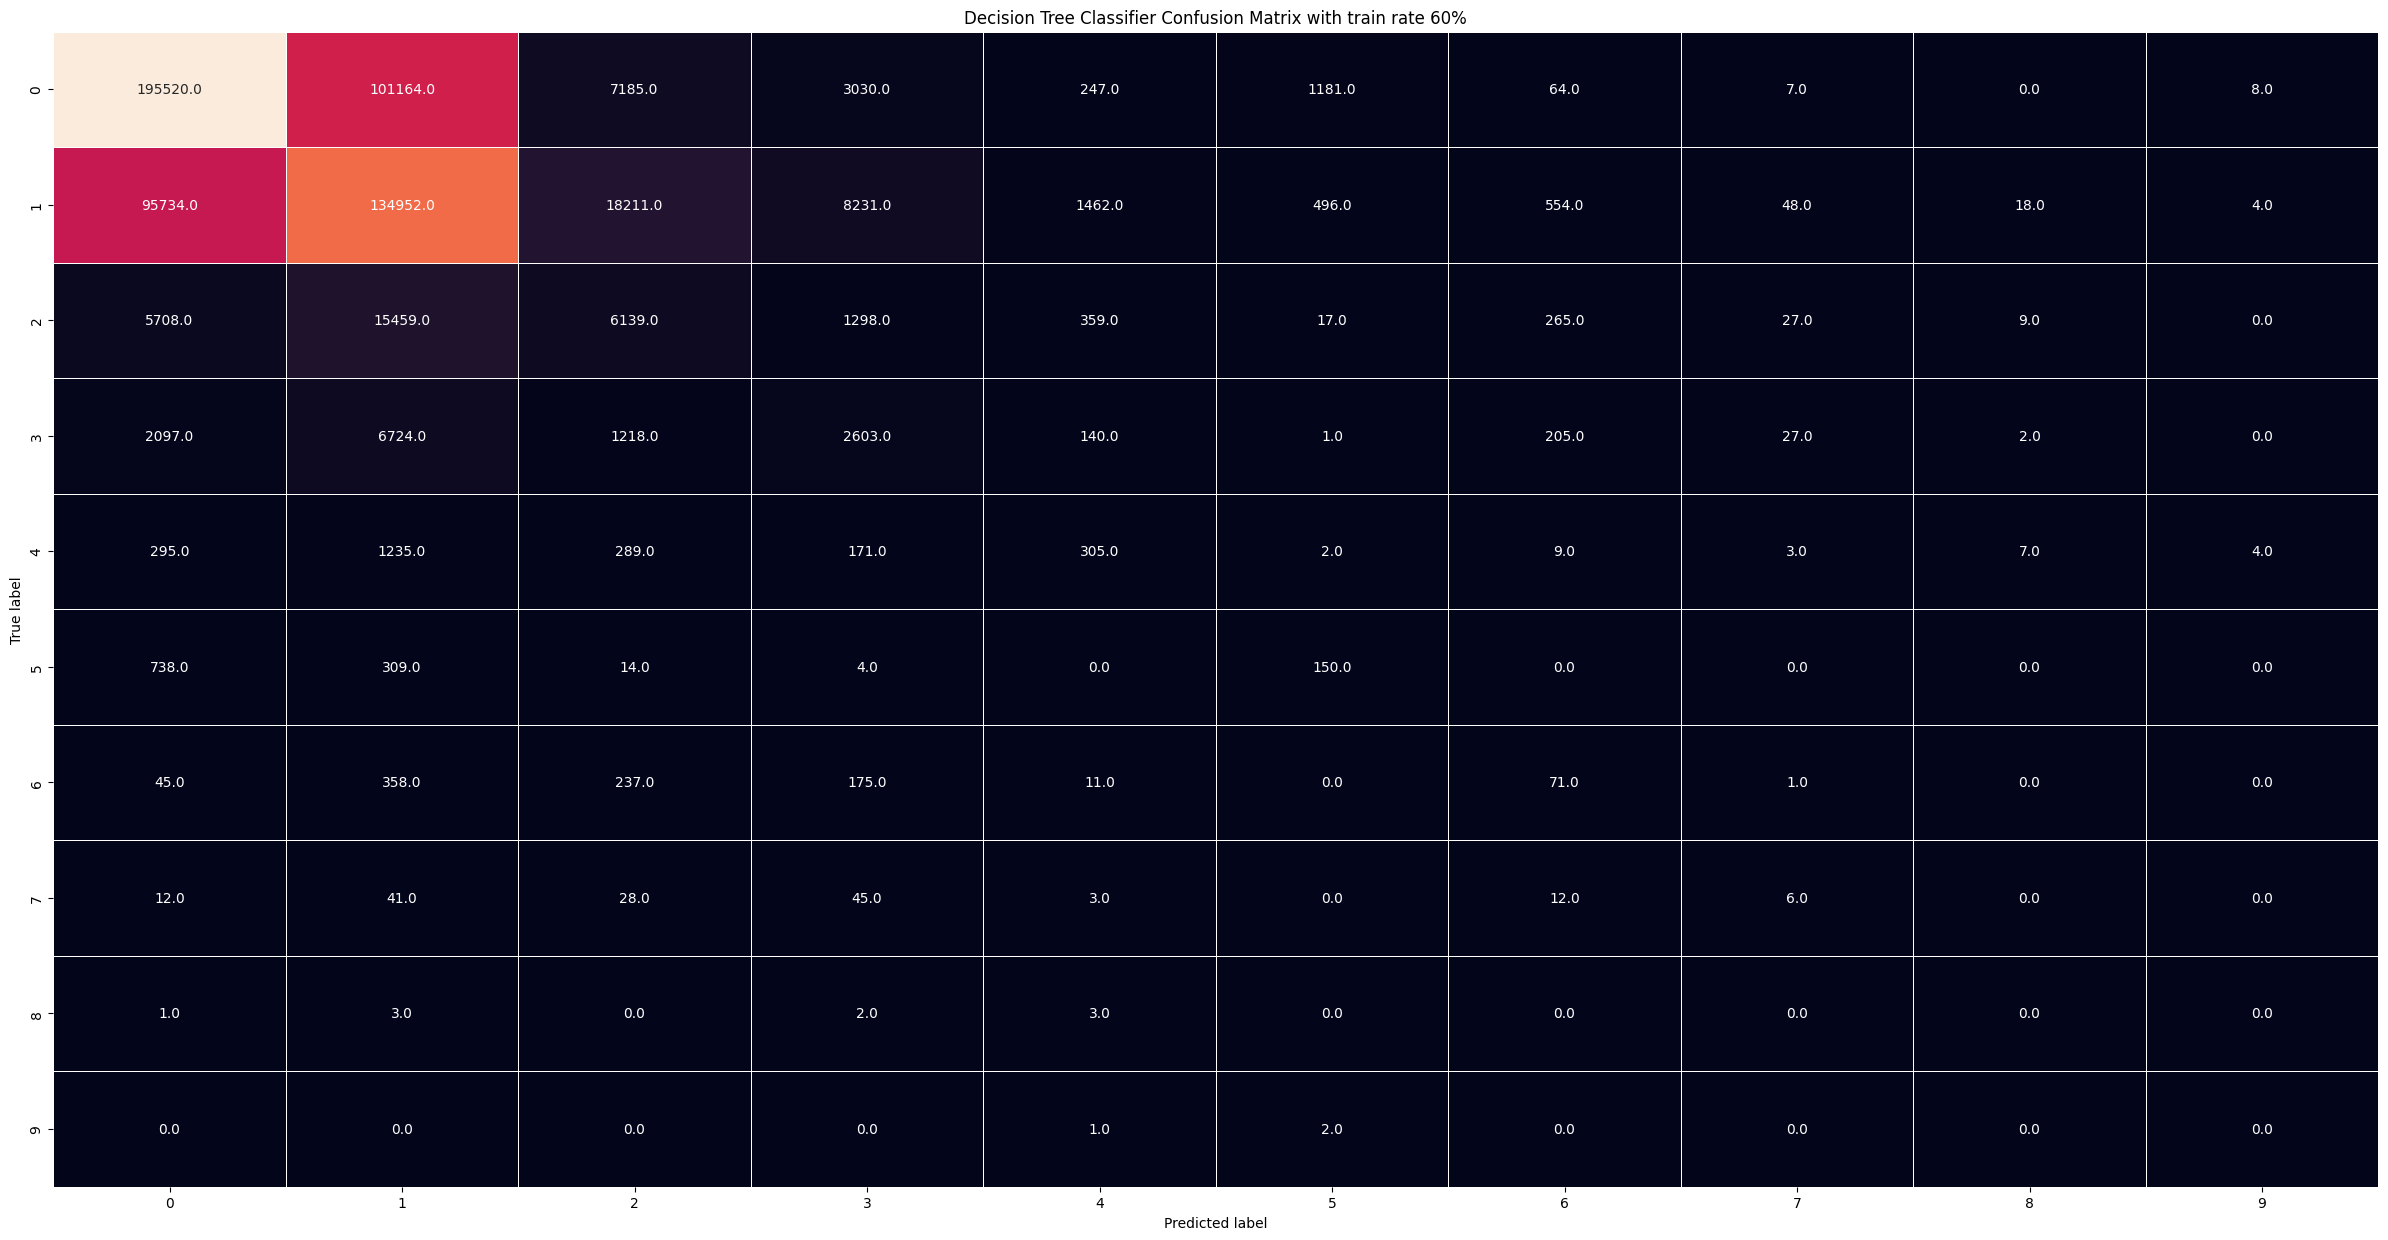

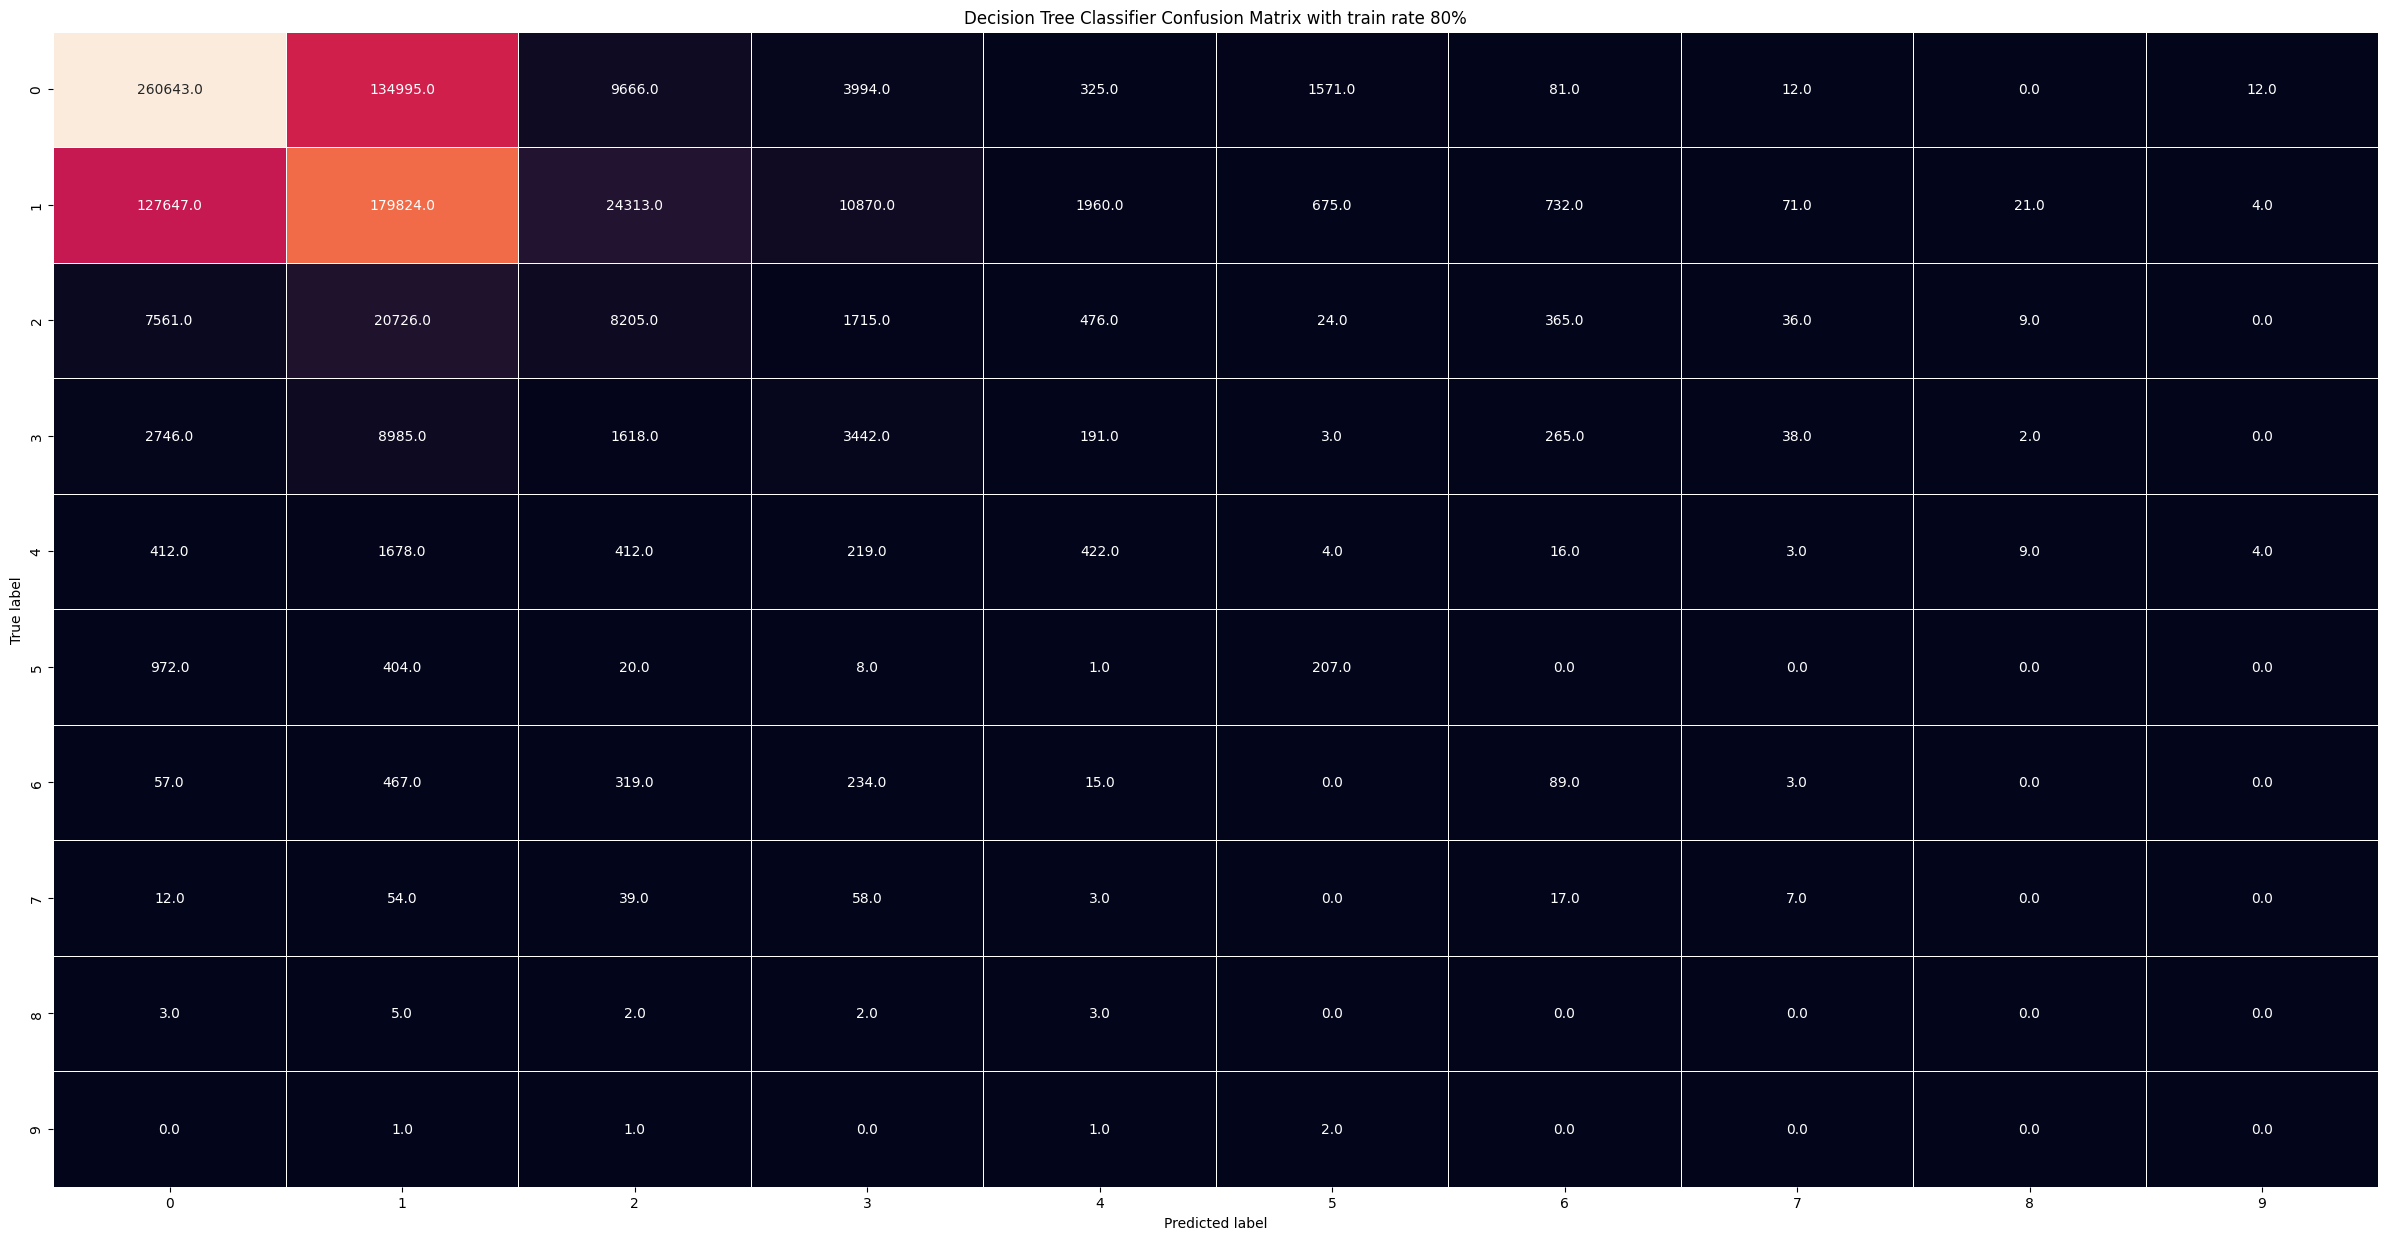

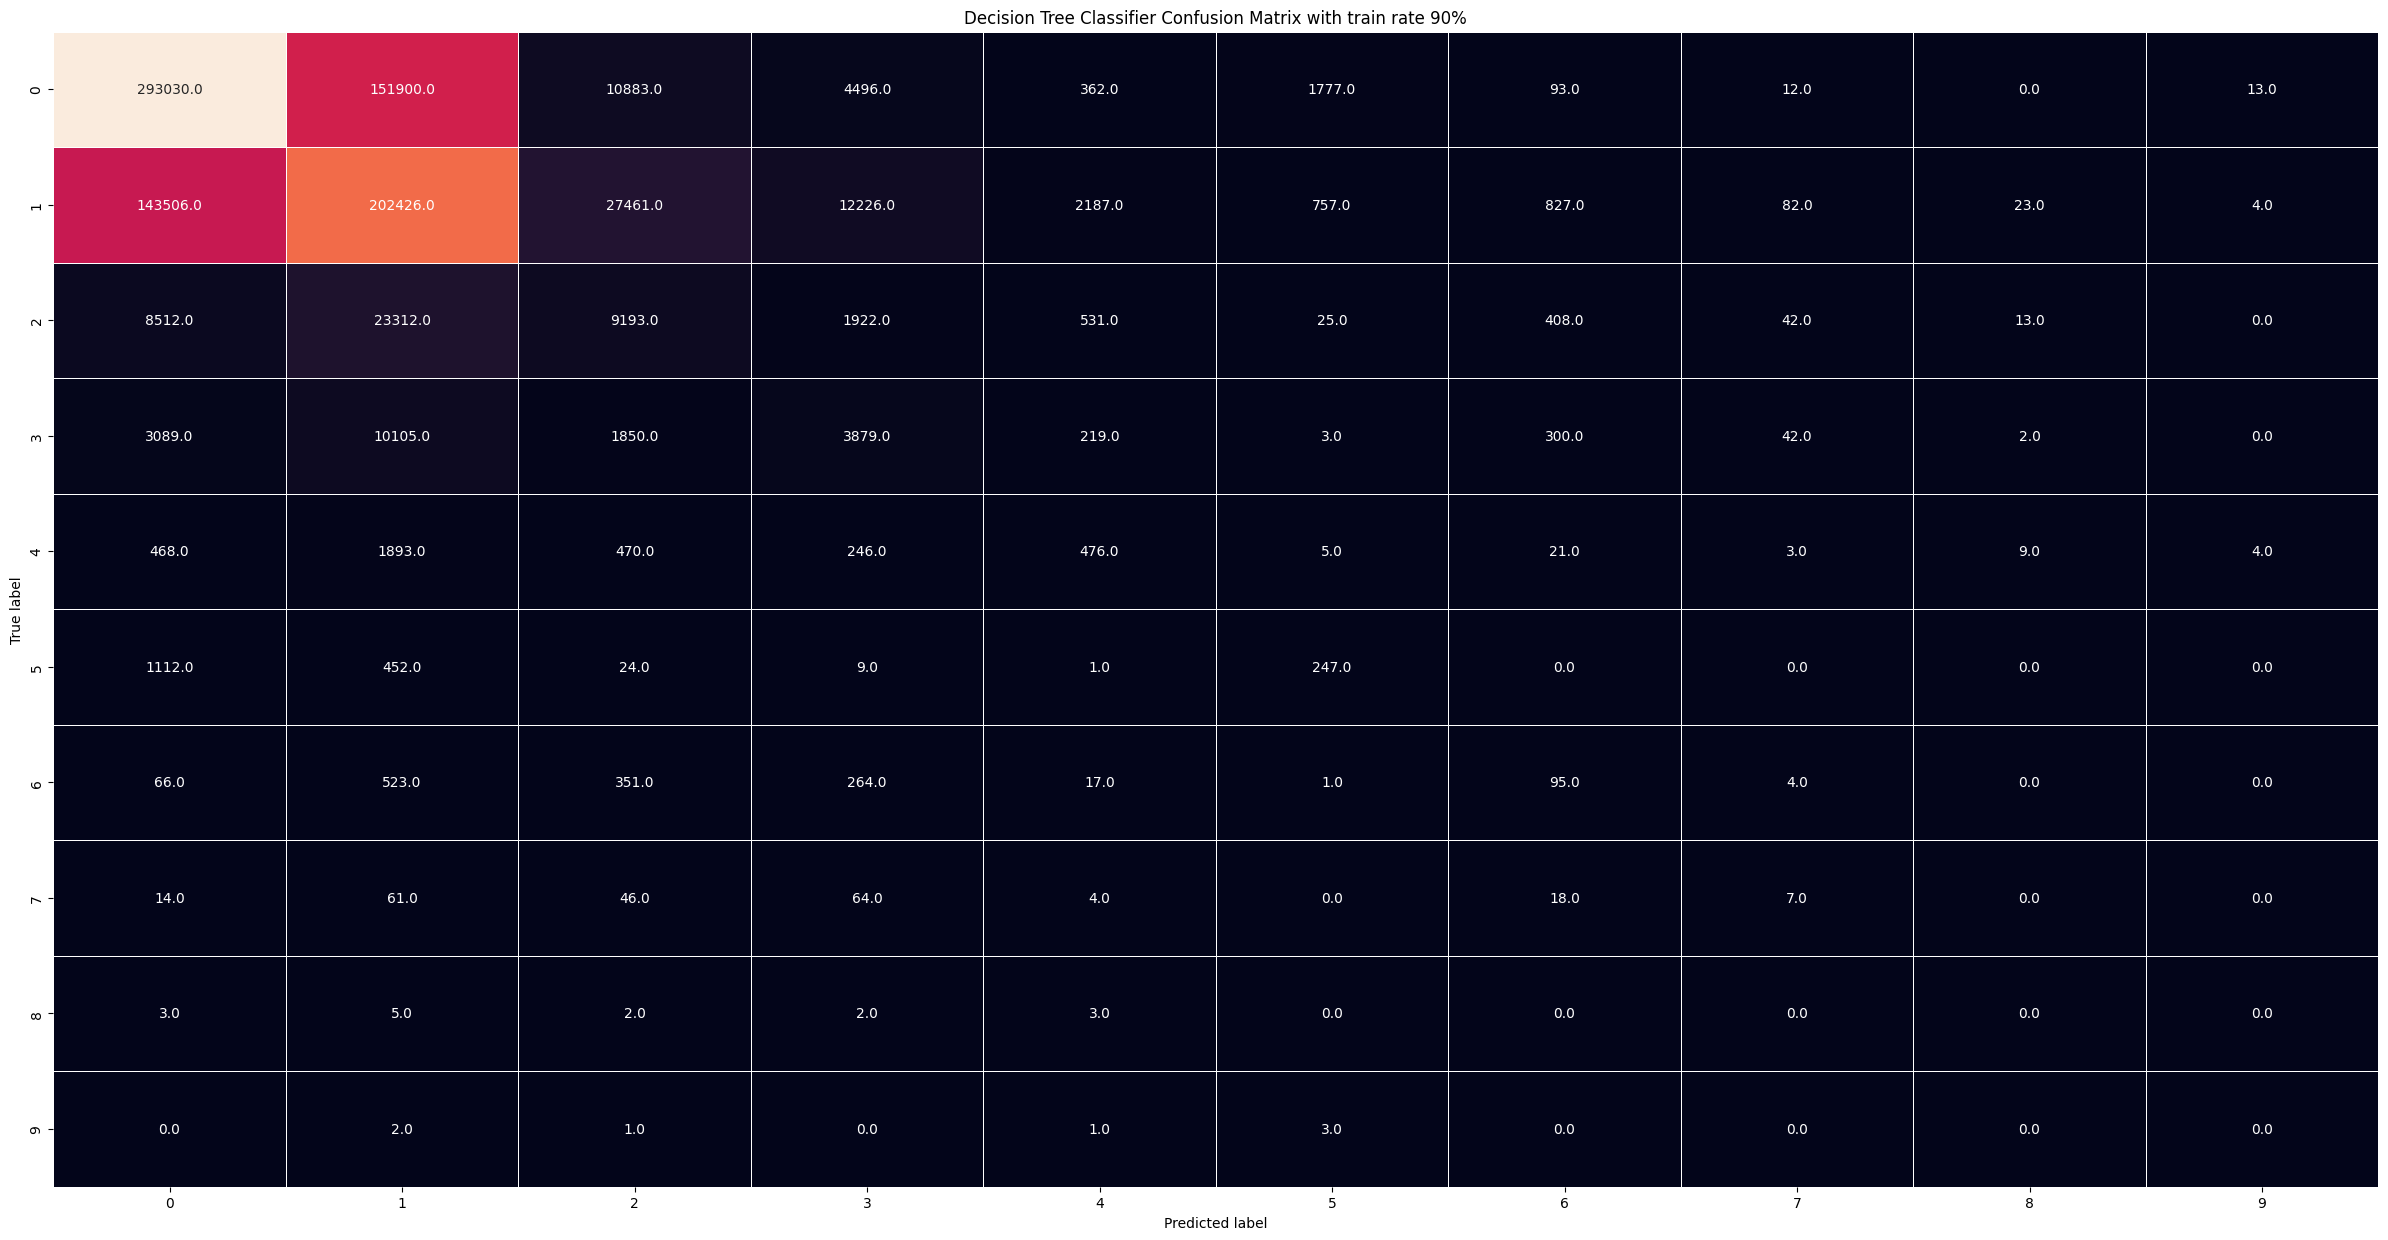

In [7]:
for proportion in rateTrain:
    featureTrain, featureTest, labelTrain, labelTest = dataSet[proportion]
    # Classifier Report
    labelPred = clf.predict(featureTest)
    print(f'Classifiers report with train rate {proportion*100:.0f}%\n', classification_report(labelTest, labelPred, zero_division=1))

    # Confusion Matrix
    cfm=confusion_matrix(labelTest, labelPred)
    plt.figure(figsize=(30, 15))
    sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None, fmt=".1f")
    plt.title(f'Decision Tree Classifier Confusion Matrix with train rate {proportion*100:.0f}%')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<span style="color: #AED6F1; font-size: 20px;">The depth and accuracy of a decision tree

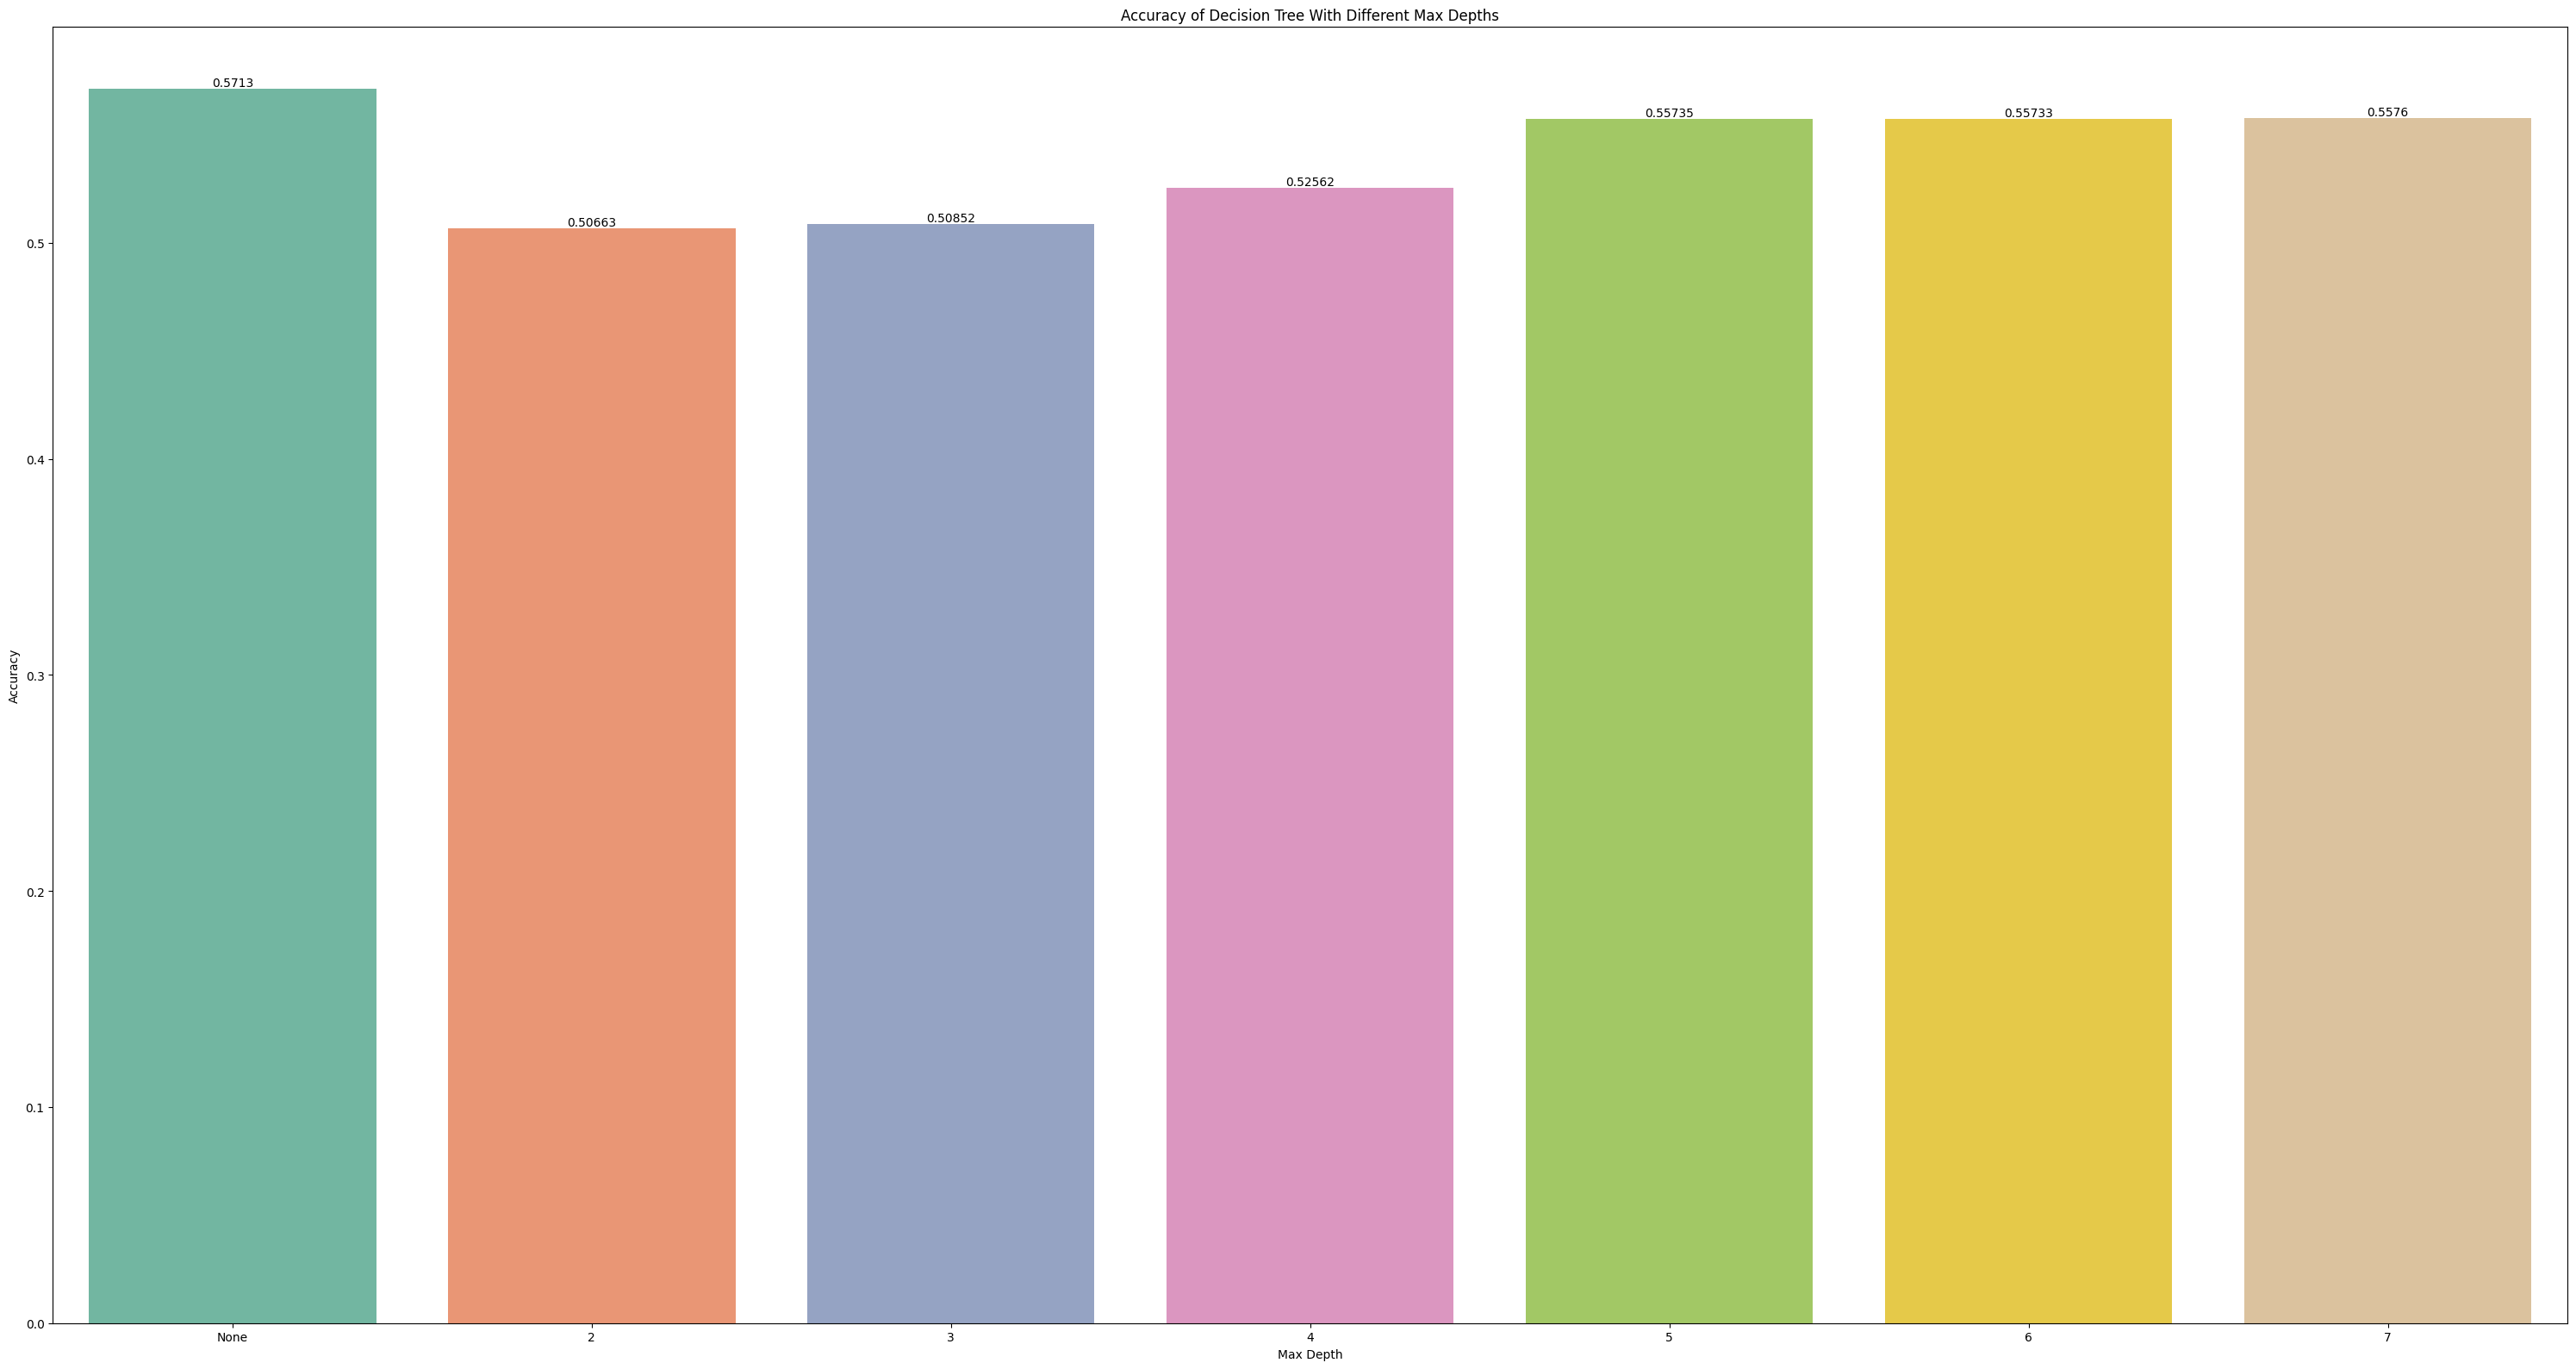

In [10]:
maxDepths = [None, 2, 3, 4, 5, 6, 7]
featureTrain, featureTest, labelTrain, labelTest = dataSet[0.8]
accuracy = []

# calculate the accuracy score of each in the maxDepths array. The function 'tree.export_graphviz()' to output the DOT form of the trained decision tree, creates a graphviz.Source object from the DOT data and uses render to save the decision tree as an image
for maxDepth in maxDepths:
    if(maxDepth == None):
        maxDepth = 9
    clf = DecisionTreeClassifier(max_depth=maxDepth, criterion='entropy')
    clf.fit(featureTrain, labelTrain)
    labelPred = clf.predict(featureTest)
    accuracy.append(accuracy_score(labelTest, labelPred))
    dotData = tree.export_graphviz(clf, out_file = None, feature_names = attributeInformation, class_names = pokerHand, max_depth = maxDepth, filled = True, rounded = True, special_characters = True)
    graph = graphviz.Source(dotData)
    if(maxDepth == 9):
        maxDepth = None
    graph.render(directory='Decision Tree With Train Rate 80%', filename=f'Decision Tree With Max Depth {maxDepth}')

maxDepths_str = [str(None), str(2), str(3), str(4), str(5), str(6), str(7)]
# draw graph accuracy score
plt.figure(figsize=(30, 16))
sns.barplot(x = maxDepths_str, y = accuracy, palette = 'Set2')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree With Different Max Depths')
for i, value in enumerate(accuracy):
    roundedValue = round(value, 5)
    plt.annotate(str(roundedValue), (i, value), ha='center', va='bottom')
plt.tight_layout()
plt.show()